# One sample t test 
- used to compare the sample mean with population mean.

#### t = (xbar - mu)/Sxbar 

#### Sxbar = s/sqrt(n)

- xbar = sample mean
- s = sample standard deviation
- Sxbar = estimated standard error of the mean ( s/sqrt(n))
- n = sample size
- mu = proposed constant for population mean

In [38]:
import numpy as np
import scipy.stats
from scipy.stats import ttest_1samp
import math

In [29]:
scores=[20,30,35,50,58,20,65,28,18,45,30,25,43,28,40,21,14,34,26,19,22,35,36,27,65,18,43,23,21,20,19,70]
print('number of students :',len(scores))
scores_mean=np.mean(scores)
print(scores_mean)

number of students : 32
32.75


Null hypothesis: Average score of total students(population) is 32.75 - {No difference}

Alt Hypothesis: Average score of total students(population) is not 32.75 - {Difference in value}

Picking a random sample of 10 students.

In [35]:
sample_size = 10
sample_scores = np.random.choice(scores,sample_size)
sample_scores

array([65, 20, 28, 65, 43, 36, 28, 34, 43, 14])

In [36]:
ttest,p_value = ttest_1samp(sample_scores,scores_mean)
print("p-value for the sample {} is {} ".format(sample_scores,p_value))
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis, there is a difference")
else:
    print("we are accepting null hypothesis, there is no difference")

p-value for the sample [65 20 28 65 43 36 28 34 43 14] is 0.39267300952578643 
we are accepting null hypothesis, there is no difference


# 2 sample t-test
- used to compare mean of 2 independent groups.


The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. 

This test is also known as: ***Independent t Test***

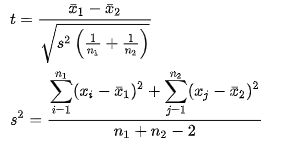

#### null: sample a & sample b have no significant difference in mean values. std_dev = 30

#### alt: sample a & sample b have significant difference in mean values. std_dev = 33

In [48]:
np.random.seed(12)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)
print('sample a mean:',classA_ages.mean())
ClassB_ages = scipy.stats.poisson.rvs(loc=18,mu=33,size=60)
print('sample b mean:',ClassB_ages.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sample a mean: 46.75
sample b mean: 50.083333333333336


In [49]:
_,p_value=scipy.stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)
print('P-value: ',p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis, there is significant difference")
else:
    print("we are accepting null hypothesis, there is no significant difference")

P-value:  0.0027289672114748317
 we are rejecting null hypothesis, there is significant difference


# Paired t-test:

- How different samples are from the same group?

#### Null: Average blood pressure level of patients have not changed significantly in a few months.

#### Alt: Average blood pressure level of patients have changed significantly in a few months.

In [63]:
bp_level1 = [25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
bp_level2 = bp_level1+stats.norm.rvs(loc=1.25,scale=5,size=15)
print('BP level of the group is :',bp_level1)
print('BP level of the group after a few months is :',bp_level2)

<IPython.core.display.Javascript object>

BP level of the group is : [25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
BP level of the group after a few months is : [21.46521076 36.33958124 21.97012616 46.21545563 25.98901095 38.22794927
 34.53650807 33.64880834 33.5929695  26.33321231 35.31909494 27.59781076
 34.35578537 23.89962544 47.82452254]


In [64]:
BP_df=pd.DataFrame({"BP_level1":np.array(bp_level1),
                    "BP_level2":np.array(bp_level2),
                    "BP_change":np.array(bp_level2)-np.array(bp_level1)})
BP_df

<IPython.core.display.Javascript object>

,BP_level1,BP_level2,BP_change
0,25,21.465211,-3.534789
1,30,36.339581,6.339581
2,28,21.970126,-6.029874
3,35,46.215456,11.215456
4,28,25.989011,-2.010989
5,34,38.227949,4.227949
6,26,34.536508,8.536508
7,29,33.648808,4.648808
8,30,33.592970,3.592970
9,26,26.333212,0.333212


In [65]:
_,p_value=stats.ttest_rel(a=bp_level1,b=bp_level2)
print('p-value :',p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")     

<IPython.core.display.Javascript object>

p-value : 0.17123568964628166
we are accepting null hypothesis


C:\Users\Priyaranjan\AppData\Local\Temp\ipykernel_37500\4005718899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BP_df['BP_change'])


<Axes: xlabel='BP_change', ylabel='Density'>

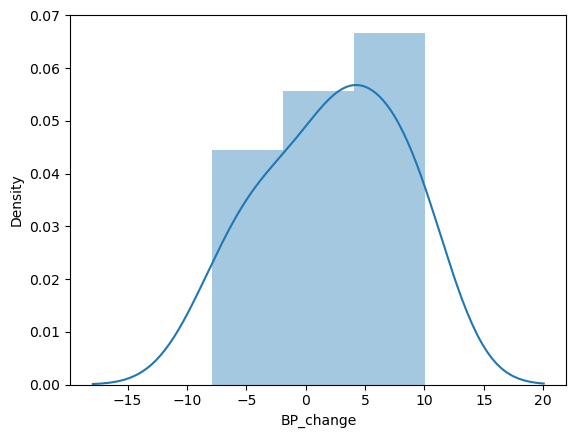

In [58]:
import seaborn as sns
sns.distplot(BP_df['BP_change'])

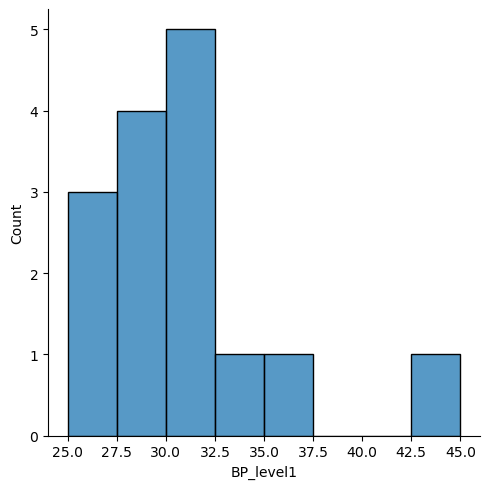

In [62]:
sns.displot(BP_df['BP_level1'])

C:\Users\Priyaranjan\AppData\Local\Temp\ipykernel_37500\3417811733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BP_df['BP_level2'])


<Axes: xlabel='BP_level2', ylabel='Density'>

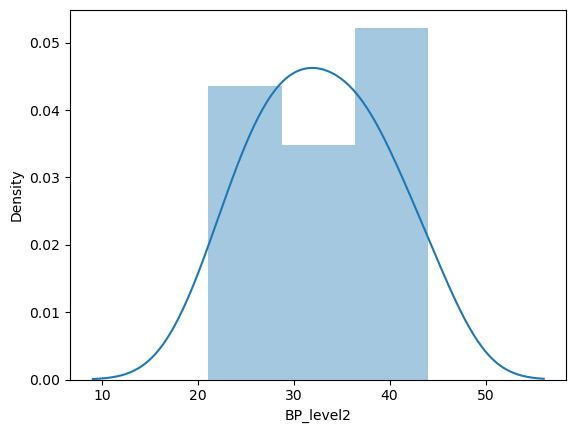

In [60]:
sns.distplot(BP_df['BP_level2'])

# Correlation

In [66]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
iris.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

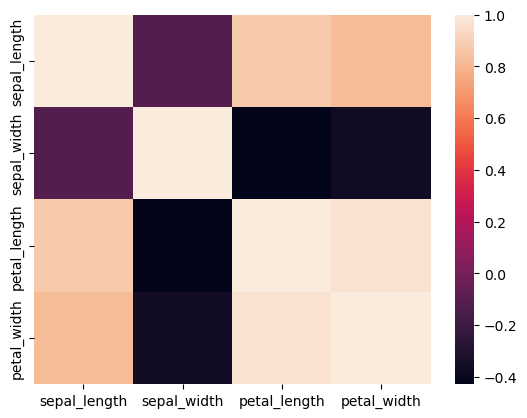

In [76]:
sns.heatmap(iris.iloc[:,:-1].corr())

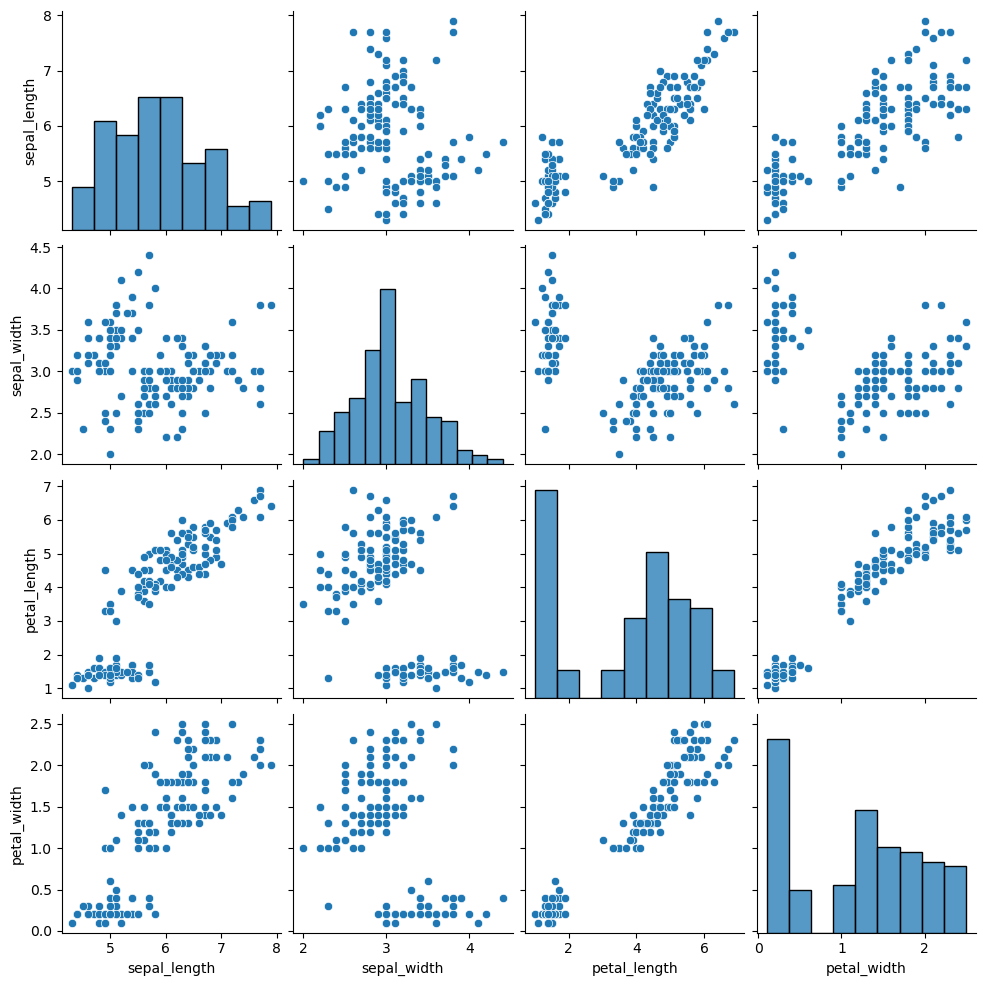

In [77]:
sns.pairplot(iris)

# Chi-Square test: categorical vs categorical
- How different categories are from the same population?
- It is used to determine whether there is a significant association between the two categorical variables.

In [78]:
import scipy.stats as st
dataset = sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [79]:
dataset_table= pd.crosstab(dataset['sex'],dataset['smoker'])
dataset_table

<IPython.core.display.Javascript object>

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [91]:
observed_values = dataset_table.values
print(observed_values)

[[60 97]
 [33 54]]


In [93]:
result = st.chi2_contingency(observed=observed_values)

In [102]:
print('observed values are: ',observed_values)
print('Expected_values are: ',result.expected_freq)

observed values are:  [[60 97]
 [33 54]]
Expected_values are:  [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [110]:
num_rows = len(dataset_table.iloc[0:2,0])
num_columns = len(dataset_table.iloc[0,0:2])
ddof = (num_rows - 1)*(num_columns-1)
print('Degree of freedom: ',ddof)
alpha = 0.05 #how much variance are we trying to capture? - 95%

Degree of freedom:  1


In [105]:
#confirming with the contingency table results.
result.dof

1

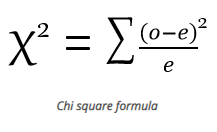

In [108]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,result.expected_freq)])
chi_square_statistic=chi_square[0]+chi_square[1]

print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [111]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [113]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
     

Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [115]:
if chi_square_statistic>=critical_value:
    print('Based on test statistic {}'.format(chi_square_statistic))
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print('Based on test statistic {}'.format(chi_square_statistic))
    print("Accept H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print('Based on p-value {}'.format(p_value))
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print('Based on p-value {}'.format(p_value))
    print("Accept H0,There is no relationship between 2 categorical variables")
     

Based on test statistic 0.001934818536627623
Accept H0,There is no relationship between 2 categorical variables
Based on p-value 0.964915107315732
Accept H0,There is no relationship between 2 categorical variables
